In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt

In [9]:
np.random.seed(42)
#function for creating datapints in circle form
def pointincircle(r, n=100):
    return [(math.cos(2 * math.pi / n * i) * r * np.random.normal(-30, 30),
             math.sin(2 * math.pi / n * i) * r * np.random.normal(-30, 30))
            for i in range(1, n + 1)]


In [12]:
#create datapoints
# Create separate dataframes
df1 = pd.DataFrame(pointincircle(500, 1000))
df2 = pd.DataFrame(pointincircle(300, 700))
df3 = pd.DataFrame(pointincircle(100, 300))
df4 = pd.DataFrame([(np.random.randint(-600,600), np.random.randint(-600,600)) for i in range(300)])

# Combine them all using concat
df = pd.concat([df1, df2, df3, df4], ignore_index=True)


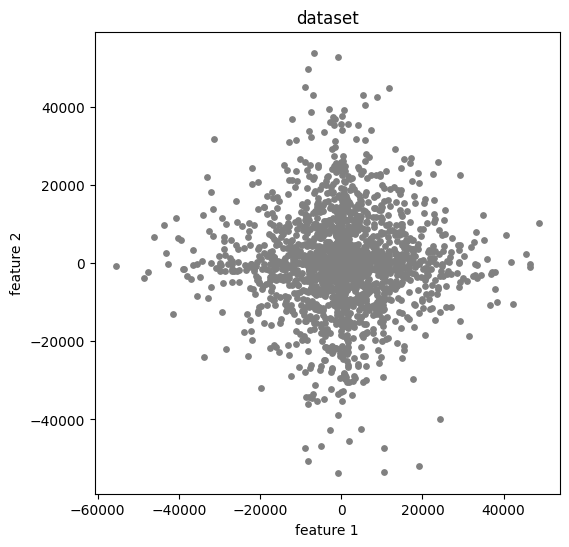

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

In [15]:
from sklearn.cluster import  KMeans
model = KMeans(n_clusters=4,random_state=42)
model.fit(df[[0,1]])

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [24]:
df['kmeans_labels'] = model.labels_

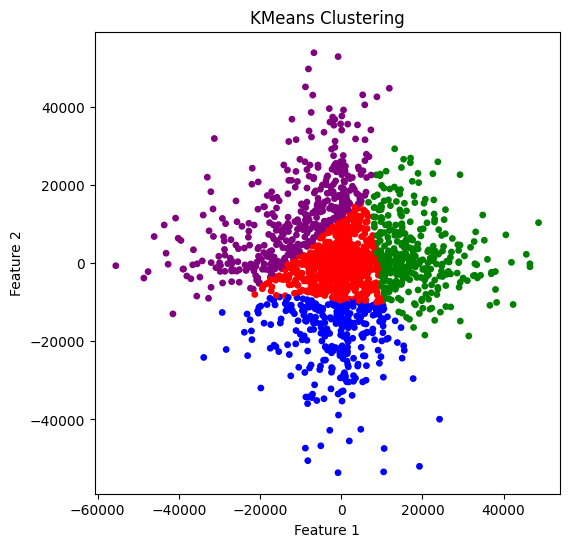

In [25]:
import matplotlib.pyplot as plt
import matplotlib.colors

colours = ['purple', 'red', 'blue', 'green']
plt.figure(figsize=(6, 6))

# Corrected line with iloc for accessing first and second columns
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['kmeans_labels'], 
            cmap=matplotlib.colors.ListedColormap(colours), s=15)

plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [33]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4, metric='euclidean') 

model.fit(df.iloc[:, [0, 1]])


,n_clusters,4
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [34]:
df['hr_labels'] = model.labels_

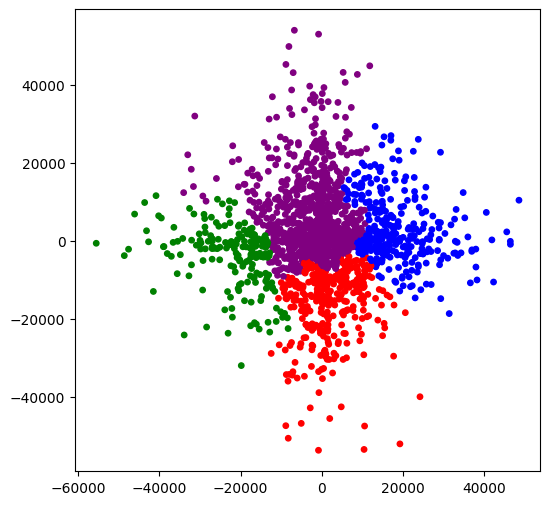

In [35]:
plt.figure(figsize=(6,6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['hr_labels'], 
            cmap=matplotlib.colors.ListedColormap(colours), s=15)
plt.show()

In [36]:
from sklearn.cluster import DBSCAN
model1 = DBSCAN(eps=30,min_samples=6)
model1.fit(df[[0,1]])

,eps,30
,min_samples,6
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [37]:
df['dbscan_labels'] = model1.labels_
df['dbscan_labels'].value_counts()

dbscan_labels
-1    2300
Name: count, dtype: int64

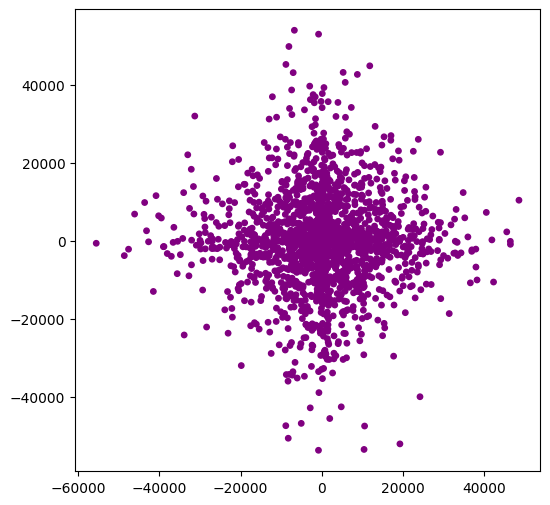

In [38]:
plt.figure(figsize=(6,6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['dbscan_labels'], 
            cmap=matplotlib.colors.ListedColormap(colours), s=15)
plt.show()